In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the train dataset.
train = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")

In [3]:
# Loading the test dataset.
test = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")

In [4]:
train.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [5]:
test.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


# Exploratory Data Analysis

In [6]:
# Checking the dimensions of the dataset.
train.shape

(31647, 18)

In [7]:
# Checking the dimensions of the dataset.
test.shape

(13564, 17)

In [8]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [9]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [10]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


"Subscribed" is our target.

# Data Visualization

subscribed
no     27932
yes     3715
Name: count, dtype: int64


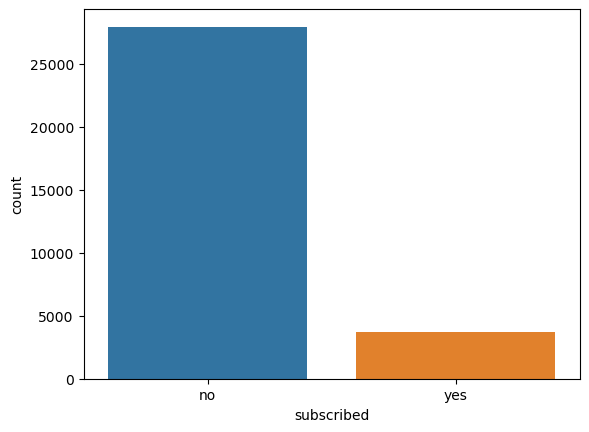

In [15]:
ax = sns.countplot(x = 'subscribed', data = train)
print(train['subscribed'].value_counts())

In [16]:
#Normalizing the 'Subscribed' variable
train['subscribed'].value_counts(normalize=True)

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64

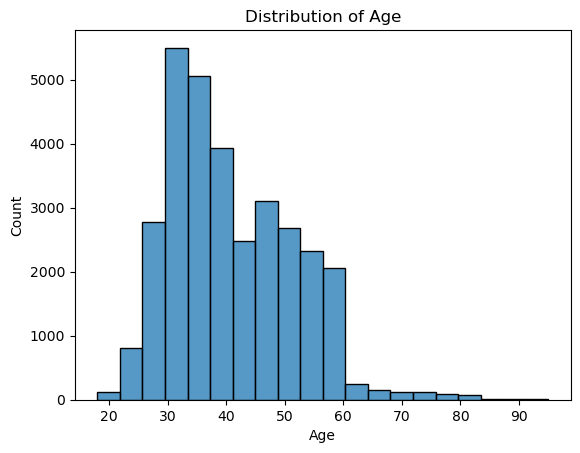

In [17]:
# Visualize the distribution of age
sns.histplot(train['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

We can see that most of the people belong to age group 20-60.

In [26]:
#Frequency table
job_counts = train['job'].value_counts()

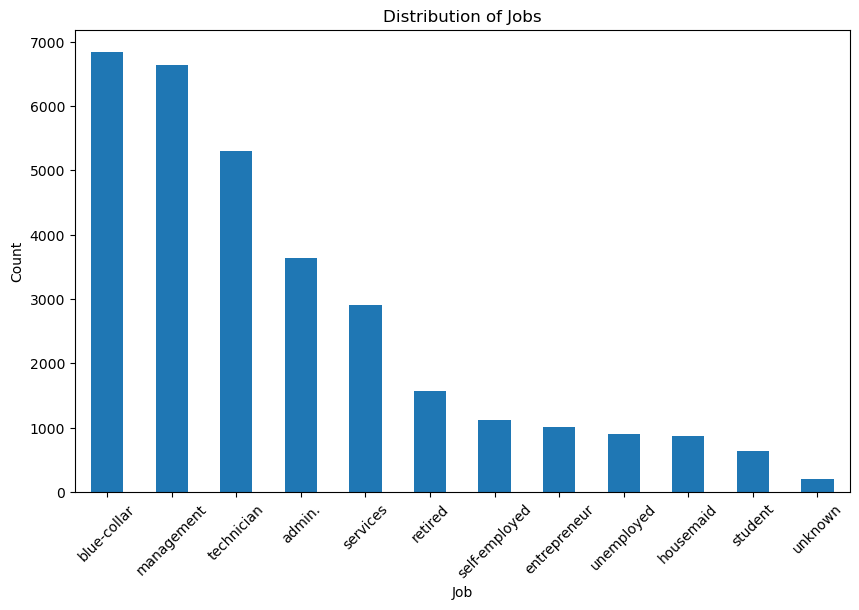

In [27]:
# Plot the distribution of jobs
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar')
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


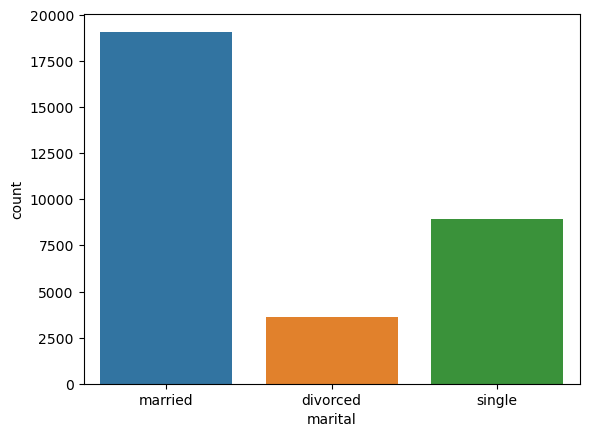

In [28]:
ax = sns.countplot(x = 'marital', data = train)
print(train['marital'].value_counts())

In [29]:
# job vs subscribed
job = pd.crosstab(train['job'],train['subscribed'])
jobs = job.div(job.sum(1).astype(float), axis=0)

<Figure size 1000x600 with 0 Axes>

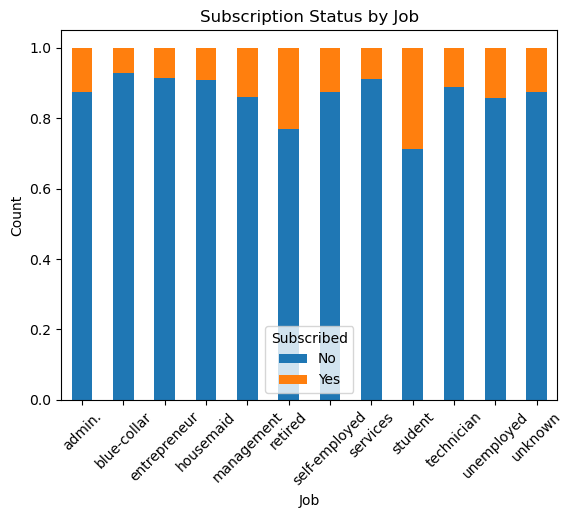

In [30]:
# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
jobs.plot(kind='bar', stacked=True)
plt.title('Subscription Status by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

In [31]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [32]:
marital = pd.crosstab(train['marital'], train['subscribed'])
maritals= marital.div(marital.sum(1).astype(float), axis=0)
maritals

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


<Axes: xlabel='marital'>

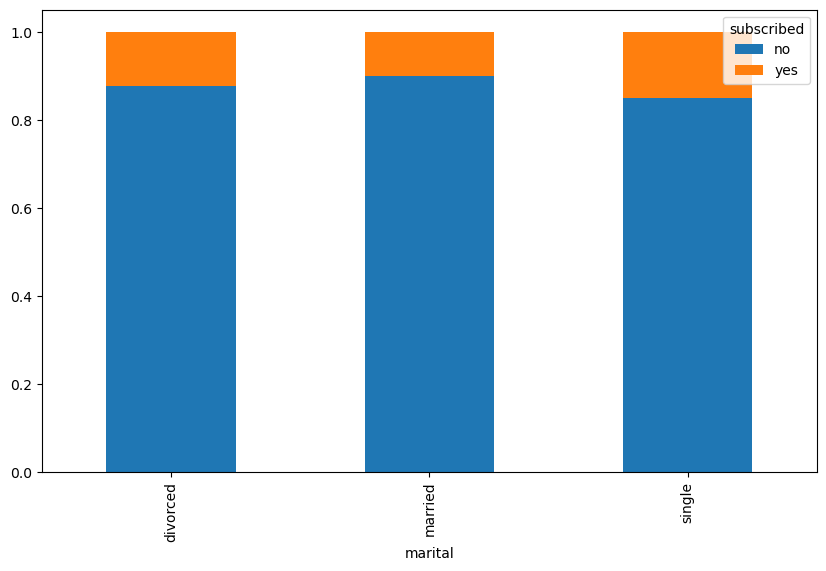

In [33]:
maritals.plot.bar(stacked=True, figsize=(10,6))

Marital status does not have major impact on the subscription to term deposits.

In [34]:
#default vs subscription
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [35]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflts = dflt.div(dflt.sum(1).astype(float), axis=0)
dflts

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

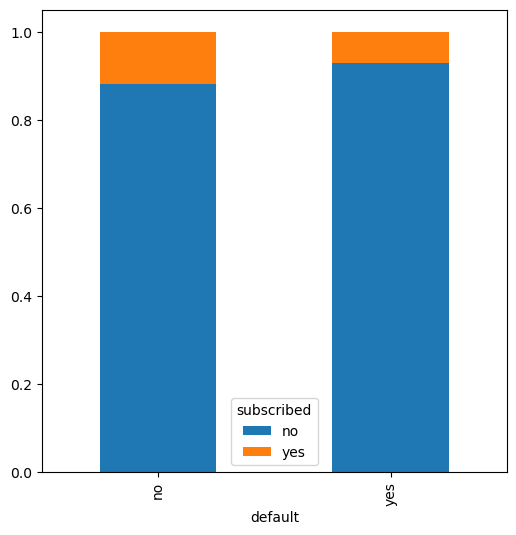

In [36]:
dflts.plot.bar(stacked=True, figsize=(6,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [37]:
# Converting the target variables into 0 and 1
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy the original DataFrame to avoid modifying the original data
train_encoded = train.copy()

# Apply label encoding to categorical variables
label_encoder = LabelEncoder()
train_encoded['job'] = label_encoder.fit_transform(train_encoded['job'])
train_encoded['marital'] = label_encoder.fit_transform(train_encoded['marital'])
train_encoded['education'] = label_encoder.fit_transform(train_encoded['education'])
# Repeat for other categorical variables

# Compute the correlation matrix
correlation_matrix = train_encoded.corr()
print(correlation_matrix)

In [41]:
#Correlation matrix
tc = train.corr()
tc

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.018790,-0.121656,...,-0.208083,0.114475,-0.238047,0.118076,0.178456,0.180922,0.329756,0.209052,0.265963,-0.496277
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,-0.055530,-0.046797,...,0.048587,0.022598,-0.128285,0.036428,0.058387,0.040462,-0.005755,-0.015908,0.029112,-0.000885
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,-0.030051,-0.051048,...,0.035545,0.025238,-0.069464,0.116274,0.040273,0.013423,0.011361,0.009141,0.028584,-0.027209
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.012114,-0.017137,...,-0.196153,-0.024551,-0.020473,0.095541,0.031461,-0.052942,-0.064980,-0.027566,-0.028971,0.079794
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,-0.012764,0.008423,...,-0.016949,-0.008491,0.007397,-0.008458,0.013256,0.015145,-0.016621,-0.002115,0.036574,-0.002768
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.019145,0.011835,...,0.048353,-0.019126,-0.066412,-0.084276,-0.050919,-0.038044,-0.087085,-0.020246,-0.057645,0.107196
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.032793,0.014206,...,-0.114253,0.037521,0.075042,0.012283,0.056424,0.072536,0.698224,0.393408,0.229305,-0.868844
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.016241,-0.017275,...,-0.059557,0.023289,0.002417,0.038587,0.049107,0.061083,0.327826,0.297019,0.189952,-0.504232
job_admin.,0.018790,-0.055530,-0.030051,-0.012114,-0.012764,-0.019145,0.032793,0.016241,1.000000,-0.189074,...,-0.007028,0.008401,0.027257,-0.011660,0.011989,0.004348,0.019712,0.015165,0.016726,-0.031425
job_blue-collar,-0.121656,-0.046797,-0.051048,-0.017137,0.008423,0.011835,0.014206,-0.017275,-0.189074,1.000000,...,0.015663,-0.043016,0.171407,-0.049513,-0.043012,-0.041842,-0.002455,-0.002122,-0.053518,0.028174


In [39]:
# Splitting dataset into target and features.
target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [40]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,True,False,...,False,False,False,True,False,False,False,False,False,True
1,40576,31,3,20,91,2,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15320,27,891,18,240,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,43962,57,3287,22,867,1,84,3,False,False,...,True,False,False,False,False,False,False,False,True,False
4,29842,31,119,4,380,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True


# Feature Scaling Using Standard Scalarization 

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)
train

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.271192,1.415793,0.187933,0.379579,-0.832754,-0.245906,-0.408555,-0.237059,2.777729,-0.525197,...,-0.365972,-0.104522,-0.66328,3.220488,-0.128236,-0.114566,-0.344763,-0.205975,-0.186885,0.469601
1,1.377516,-0.937156,-0.449397,0.499526,-0.649957,-0.245906,-0.408555,-0.237059,-0.360006,-0.525197,...,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566,-0.344763,-0.205975,-0.186885,0.469601
2,-0.554001,-1.313627,-0.156159,0.259631,-0.070449,-0.567059,-0.408555,-0.237059,-0.360006,-0.525197,...,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566,-0.344763,-0.205975,-0.186885,0.469601
3,1.636469,1.509911,0.635055,0.739422,2.368149,-0.567059,0.447299,1.001336,-0.360006,-0.525197,...,2.732452,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566,-0.344763,-0.205975,5.350890,-2.129466
4,0.556606,-0.937156,-0.411091,-1.419637,0.474054,-0.567059,-0.408555,-0.237059,-0.360006,-0.525197,...,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566,-0.344763,-0.205975,-0.186885,0.469601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.064493,-1.125392,-0.450388,-0.460055,-0.552724,-0.245906,-0.408555,-0.237059,-0.360006,-0.525197,...,-0.365972,-0.104522,1.50766,-0.310512,-0.128236,-0.114566,-0.344763,-0.205975,-0.186885,0.469601
31643,1.347078,1.133439,-0.324903,-1.299690,0.699635,-0.245906,-0.408555,-0.237059,-0.360006,-0.525197,...,2.732452,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566,-0.344763,-0.205975,-0.186885,0.469601
31644,-0.218265,-0.843038,-0.347358,-1.059794,-0.859979,0.075247,-0.408555,-0.237059,-0.360006,-0.525197,...,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566,-0.344763,-0.205975,-0.186885,0.469601
31645,1.223031,1.509911,-0.376088,-0.100212,-0.918319,1.359859,2.994723,4.716521,-0.360006,-0.525197,...,-0.365972,-0.104522,1.50766,-0.310512,-0.128236,-0.114566,2.900543,-0.205975,-0.186885,-2.129466


# Model Building

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
#creating an object of logistic regression model
log_reg = LogisticRegression()

In [50]:
#fitting the data into the model
log_reg.fit(X_train,y_train)

LogisticRegression()

In [51]:
LogisticRegression()

LogisticRegression()

In [52]:
#Making predictions on the validation set
pred = log_reg.predict(X_val)

In [54]:
from sklearn.metrics import accuracy_score
#Calculating the accuracy score
accuracy_score(y_val,pred)

0.9037914691943127

We got an accuracy score of around 90% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.Using Decision Tree algorithm to for dealing with non-linearity.

### Using Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

In [57]:
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [58]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
#Calculating the accuracy
accuracy_score(y_val,predict)

0.90347551342812

In [60]:
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
1,40403,78,2787,1,372,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3709,31,144,16,676,1,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,37422,57,3777,13,65,2,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
4,12527,45,-705,3,111,1,-1,0,False,True,...,False,False,False,False,False,False,False,False,False,True


In [61]:
test_pred = clf.predict(test)
test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
model = pd.DataFrame()

In [63]:
model['ID'] = test['ID']
model['subscribed'] = test_pred

In [64]:
model['subscribed']

0        1
1        1
2        1
3        1
4        1
        ..
13559    1
13560    1
13561    1
13562    1
13563    1
Name: subscribed, Length: 13564, dtype: int64

In [65]:
model['subscribed'].replace(0,'no',inplace=True)
model['subscribed'].replace(1,'yes',inplace=True)

In [66]:
model['subscribed']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
13559    yes
13560    yes
13561    yes
13562    yes
13563    yes
Name: subscribed, Length: 13564, dtype: object

In [67]:
model.to_csv('Bank_Marketing_file.csv', header=True, index=False)